[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soumi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
app: 5890
time: 1394
good: 1277
one: 1203
trading: 990
also: 943
customer: 940
like: 845
option: 844
please: 820

Named Entities:
last 2/3 months - DATE
100 - CARDINAL
Mbps - NORP
two - CARDINAL
DEFINITELY - ORG
first - ORDINAL
a few seconds - TIME
5 - CARDINAL
100mbps - CARDINAL
Kite - PERSON
3 - CARDINAL
the past 2 weeks - DATE
Edit - Graphs - PERSON
API - ORG
TIJORI - ORG
the next day - DATE
700 - CARDINAL
Limited - ORG
200 - CARDINAL
700 - CARDINAL
UI - ORG
UI - ORG
CNC - ORG
MIS - ORG
two - CARDINAL
MIS(Intraday - DATE
Zerodha - ORG
5 years - DATE
Angle - PRODUCT
2019 - DATE
Zerodha - ORG
7 - CARDINAL
Max - PERSON
10 - CARDINAL
One - CARDINAL
2.0 - CARDINAL
1.0 - CARDINAL
1.0 - CARDINAL
2.0 - CARDINAL
1.0 - CARDINAL
FnO - ORG
one - CARDINAL
UI - GPE
Groww - PERSON
1.When - CARDINAL
2 - CARDINAL
3. - CARDINAL
4 - CARDINAL
200 bucks - MONEY
more than a week - DATE
20 - CARDINAL
T.T. - ORG
3rd - ORDINAL
Feature:* - - ORG
Portfolio Management:* - Provide - ORG
today - DA

) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


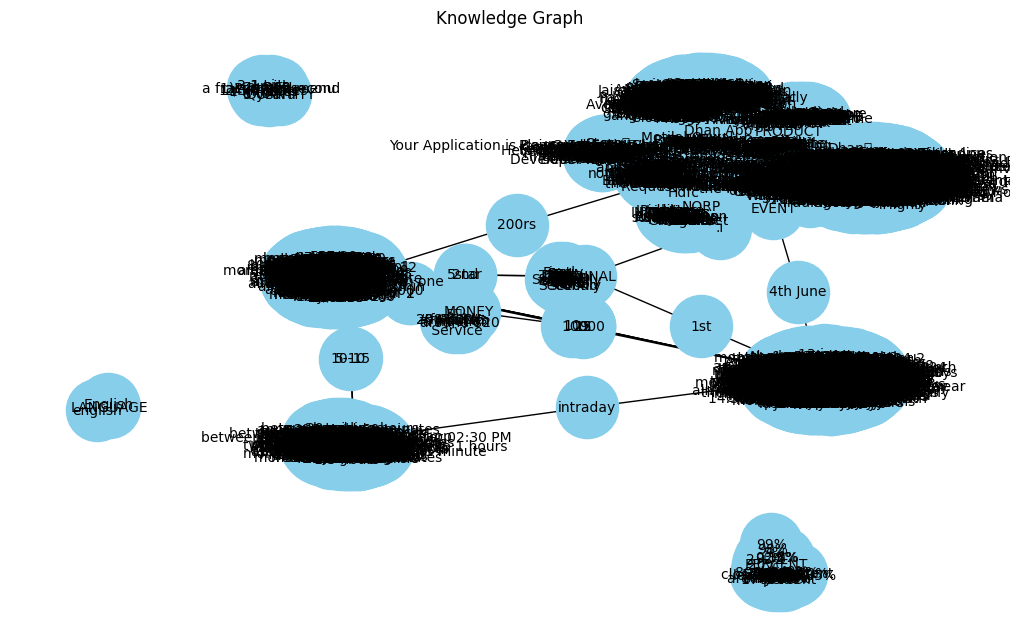

In [1]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file
csv_file = 'sentiments.csv'
df = pd.read_csv(csv_file)
# Combine all comments into a single string
text_data = ' '.join(df['Comment'].astype(str).tolist()) # Assuming the column is named 'comments'
# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower()) # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word 
not in stop_words]
# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
 print(f"{word}: {count}")
# Step 2: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000
doc = nlp(text_data)
print("\nNamed Entities:")
for ent in doc.ents:
 print(f"{ent.text} - {ent.label_}")
# Step 3: Derive Knowledge Graph
edges = []
for ent in doc.ents:
 edges.append((ent.text, ent.label_))
# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)
# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, 
font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()

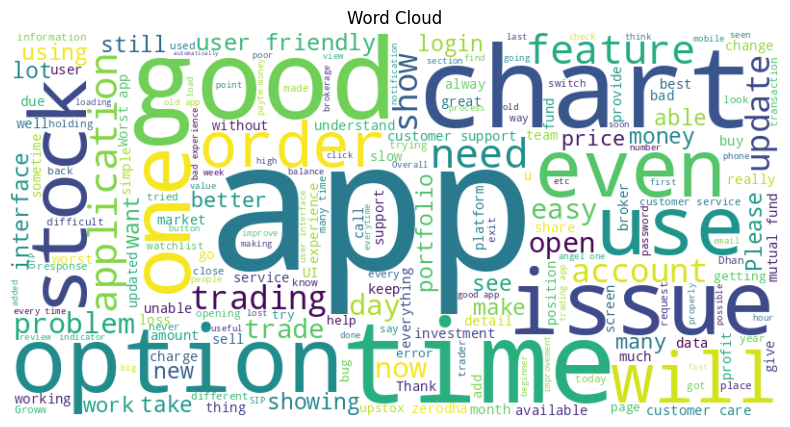

In [2]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, 
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [3]:
from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
 print(f"{' '.join(bigram)}: {count}")



Top 10 Bigrams:
user friendly: 332
customer support: 324
customer care: 270
worst app: 231
app good: 202
customer service: 188
easy use: 155
every time: 153
many times: 153
using app: 145


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Comment'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
    00  000  001   01   02   03  03rd   04  04th   05  ...  zerosha  zerotha  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...      0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...      0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...      0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...      0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...      0.0      0.0   

   zigzag  zone  zoom  zoomed  zooming  zooms   ìf   òn  
0     0.0   0.0   0.0     0.0      0.0    0.0  0.0  0.0  
1     0.0   0.0   0.0     0.0      0.0    0.0  0.0  0.0  
2     0.0   0.0   0.0     0.0      0.0    0.0  0.0  0.0  
3     0.0   0.0   0.0     0.0      0.0    0.0  0.0  0.0  
4     0.0   0.0   0.0     0.0      0.0    0.0  0.0  0.0  

[5 rows x 8657 columns]
